## Steps
1. Download HS annotated dataset


In [1]:
import pandas as pd
from tqdm import tqdm

PATH = '../../hsle/data/'
HS_FILE = PATH + 'completed/hs_annotated_1apr.csv'

In [2]:
hsdf = pd.read_csv(HS_FILE)
hsdf = hsdf.loc[hsdf.IsHS==1,:]
print(hsdf.shape)
display(hsdf.head(3))

(158, 15)


,lexId,LexFound,postId,cId,nId,MsgUniSeg,NewHSWordInSentence,IsCOVID19,IsHS,IsHSL,Remarks,PostURL,date,time,ProfileUrl
0,NaN,ကုလားတွေ,25032020_0170,252,1,မွတ် ကုလားတွေ က ငါတို့ တိုင်းရင်းသား မဟုတ် ဘူး ကွ,"မွတ်, မွတ်ကုလား, မွတ်ကုလားတွေ",0.0,1.0,1.0,NaN,https://www.facebook.com/7daynews/posts/315202...,2020-03-24,7:36:55,https://www.facebook.com/profile.php?id=100009...
2,NaN,ကုလားတွေ,25032020_0170,252,8,KoSoe မင်း အမေ လင် တွေ ဟ မွတ် ကုလားတွေ က ခွေး သား,NaN,0.0,1.0,1.0,NaN,https://www.facebook.com/7daynews/posts/315202...,2020-03-24,18:47:47,https://www.facebook.com/profile.php?id=100006...
3,NaN,ကုလားတွေ,25032020_0170,382,0,စောက် ကုလားတွေ လို့ မ ဆဲ ကျ တော့ ဘူး လား 😊,NaN,0.0,1.0,0.0,Provoke hate speech?,https://www.facebook.com/7daynews/posts/315202...,2020-03-24,7:39:44,https://www.facebook.com/profile.php?id=100013...


In [3]:
hsdf.columns

Index(['lexId', 'LexFound', 'postId', 'cId', 'nId', 'MsgUniSeg',
       'NewHSWordInSentence', 'IsCOVID19', 'IsHS', 'IsHSL', 'Remarks',
       'PostURL', 'date', 'time', 'ProfileUrl'],
      dtype='object')

In [13]:
print(hsdf.shape)
byProfileUrl = hsdf.groupby('ProfileUrl')['cId'].count()
byProfileUrl = pd.DataFrame({
    'ProfileUrl': byProfileUrl.index,
    'HsCommentCount': byProfileUrl.values
})
byProfileUrl.shape

(158, 15)


(152, 2)

In [14]:
byProfileUrl.head()

,ProfileUrl,HsCommentCount
0,https://www.facebook.com/profile.php?id=100000...,1
1,https://www.facebook.com/profile.php?id=100001...,1
2,https://www.facebook.com/profile.php?id=100001...,1
3,https://www.facebook.com/profile.php?id=100002...,1
4,https://www.facebook.com/profile.php?id=100002...,1


## Have these actors been active in the time given time period?
- How many comments have they made, malicious or non-malicious?

In [8]:
rawFile = '/home/bupi/Documents/pdy/hs/hsle/data/exportcomments-outputs/20200413_20200420/processed/merged.csv'
rawdf = pd.read_csv(rawFile, usecols=['Profile ID', 'LexFound'])
rawdf.columns = ['profile_id', 'lex_found']
rawdf['profile_id'] = [p.split()[-1] for p in rawdf.profile_id]
rawdf.head()

,profile_id,lex_found
0,100017924341255,NaN
1,100009696576683,NaN
2,100015183965181,NaN
3,100011545354617,NaN
4,100004710211119,NaN


In [4]:
pd.read_csv(rawFile, nrows=1)

,cId,nId,Name (click to view profile),Profile ID,Date,Likes,Comment,(view source),postId,nChars,MsgUni,atleast1MM,MsgUniSeg,LexFound,PostURL
0,1,0,Kyaw Thet,ID: 100017924341255,2020-04-13 17:52:10,0,သင့္ေၾကာင့္ကိုဗစ္မကူးပါေစနဲ႔လို,view comment,20200413_0337,31,သင့်ကြောင့်ကိုဗစ်မကူးပါစေနဲ့လို,True,သင့် ကြောင့် ကို ဗစ် မ ကူး ပါစေ နဲ့ လို,NaN,https://www.facebook.com/themyanmartimes/posts...


In [12]:
hsdf = rawdf.loc[~rawdf.lex_found.isna(),:]
print(len(hsdf.profile_id.unique()))

2604


In [13]:
rawByProfileId = rawdf.groupby('profile_id')['profile_id'].count()
# rawByProfileId = pd.DataFrame({
#     'ProfileId': rawByProfileId.index,
#     'Qty': rawByProfileId.values
# })
# rawByProfileId.sort_values('Qty', ascending=False, inplace=True)
print(rawByProfileId.shape)
rawByProfileId.head()

(95201,)


profile_id
100000000390760    1
100000001363576    1
100000001720901    1
100000001952698    1
100000002054008    1
Name: profile_id, dtype: int64

## How active are the HS actors?

In [15]:
actorsActivity = rawByProfileId[hsdf.profile_id.unique()]
actorsActivity.sort_values(ascending=False)

profile_id
100002366838046    40
100036896050893    33
100014938440875    33
100009583100175    23
100023489663257    23
                   ..
100025321161414     1
100014459077198     1
100046990147250     1
100007153900422     1
100010485819094     1
Name: profile_id, Length: 2604, dtype: int64

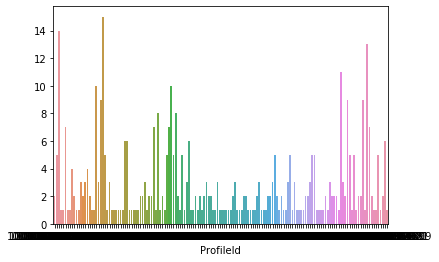

In [83]:
# import seaborn as sns
# sns.barplot(x=actorsActivity.index,y=actorsActivity.values)

In [23]:
# x = pd.Series(hsdf.HsCommentCount)
# x.index = byProfileUrl.ProfileId
# x[actorsActivity.index]

col = 'TotalComments_{}'.format(rawFile.split('/')[-3])
actors_activity_df = pd.DataFrame({
    'ProfileUrl': ['https://www.facebook.com/profile.php?id={}'.format(x) for x in actorsActivity.index],
    col: actorsActivity.values,
    # 'ConfirmedHsCount': x[actorsActivity.index]
})
print(actors_activity_df.shape)
actors_activity_df = actors_activity_df.loc[actors_activity_df[col]>1]
print(actors_activity_df.shape)
actors_activity_df.sort_values(col, ascending=False, inplace=True)
actors_activity_df.head()

(2604, 2)
(1167, 2)


,ProfileUrl,TotalComments_20200413_20200420
2548,https://www.facebook.com/profile.php?id=100002...,40
959,https://www.facebook.com/profile.php?id=100014...,33
1504,https://www.facebook.com/profile.php?id=100036...,33
667,https://www.facebook.com/profile.php?id=100009...,23
936,https://www.facebook.com/profile.php?id=100023...,23


In [85]:
## Grab the Actual comments
res1.TotalComments_23_25032020.sum()

300

In [86]:
maskHighHs = [i in res1.loc[res1.ConfirmedHsCount>1,:].index
    for i in tqdm(rawdf.ProfileId)]

100%|██████████| 58725/58725 [01:23<00:00, 699.72it/s]


In [93]:
rawFile = '/home/bupi/Documents/pdy/hs/hsle/data/exportcomments-outputs/23_25032020/processed/merged.csv'
rawdf = pd.read_csv(rawFile, usecols=['Profile ID','MsgUniSeg','PostURL'])
rawdf.columns = ['ProfileId','Msg','PostURL']
rawdf = rawdf.loc[maskHighHs,:]
rawdf['ProfileUrl'] = ['https://www.facebook.com/profile.php?id={}'.format(x.split()[-1]) for x in rawdf.ProfileId]
rawdf.sort_values('ProfileId',inplace=True)
print(rawdf.shape)
rawdf.head()

(26, 4)


,ProfileId,Msg,PostURL,ProfileUrl
1067,ID: 100014910439080,င ပလီ အကုန် ပါ ရ မှာ ပါ ။ မ ပါ လည်း ပါ သင့် ပါ...,https://www.facebook.com/ElevenMediaGroup/post...,https://www.facebook.com/profile.php?id=100014...
1108,ID: 100014910439080,တစ် ချို့ Tour လုပ်ငန်း တွေ ကို လည်း စာနာ ပါ တ...,https://www.facebook.com/ElevenMediaGroup/post...,https://www.facebook.com/profile.php?id=100014...
4159,ID: 100014910439080,ThuReinKhant အဲဒါ ပြော တာ ။ မန ကိ ဖြန် အလုပ်ပြ...,https://www.facebook.com/ElevenMediaGroup/post...,https://www.facebook.com/profile.php?id=100014...
4687,ID: 100014910439080,မန ကိ ဖြန် အလုပ်ပြုတ် မ လား .. သန်ဘက်ခါ လစာ မဲ...,https://www.facebook.com/ElevenMediaGroup/post...,https://www.facebook.com/profile.php?id=100014...
9059,ID: 100014910439080,ခု .. စ တွေ့ ပြီ ဆို တော့ အသံ ပေါင်း စုံ နဲ့ ဆ...,https://www.facebook.com/ElevenMediaGroup/post...,https://www.facebook.com/profile.php?id=100014...


In [94]:
rawdf.to_csv('../results/highConfirmedHsActorsComments.csv', index=False)